## Pregunta de investigación 1

¿Qué factores influyen en la recaudación mundial de una película?

El objetivo es identificar qué características de una película están asociadas
con mayores niveles de recaudación mundial, utilizando técnicas de análisis
exploratorio y un modelo de regresión lineal.

## Importación de librerías

Importamos las librerías necesarias para análisis de datos, visualización y estadística.

In [1112]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 2. Carga y exploración inicial de datos

Cargamos el archivo CSV, mostramos información general, primeras filas y estadísticos descriptivos básicos.

In [1113]:
# Carga de datos y exploración inicial
df = pd.read_csv('Blockbusters_2019-1977.csv', encoding='latin1')
display(df.head())
display(df.info())
display(df.describe(include='all'))

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,"160,000,000",129,Sony Pictures,"1,131,927,996","390,532,085",Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,"175,000,000",123,Walt Disney,"1,128,274,794","426,829,839",Action,Adventure,Sci-Fi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating           429 non-null    object 
 4   film_title            430 non-null    object 
 5   film_budget           430 non-null    object 
 6   length_in_min         430 non-null    int64  
 7   domestic_distributor  430 non-null    object 
 8   worldwide_gross       430 non-null    object 
 9   domestic_gross        430 non-null    object 
 10  genre_1               430 non-null    object 
 11  genre_2               409 non-null    object 
 12  genre_3               324 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 43.8+ KB


None

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
count,430.000000,430.000000,430.000000,429,430,430,430.000000,430,430,430,430,409,324
unique,NaN,NaN,NaN,4,427,142,NaN,25,430,430,12,19,17
top,NaN,NaN,NaN,PG-13,The Lion King,"200,000,000",NaN,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Sci-Fi
freq,NaN,NaN,NaN,178,2,24,NaN,76,1,1,194,181,58
mean,1998.000000,5.500000,7.076744,NaN,NaN,NaN,120.602326,NaN,NaN,NaN,NaN,NaN,NaN
std,12.424129,2.875627,0.801815,NaN,NaN,NaN,22.615721,NaN,NaN,NaN,NaN,NaN,NaN
min,1977.000000,1.000000,3.700000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1987.000000,3.000000,6.600000,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1998.000000,5.500000,7.000000,NaN,NaN,NaN,119.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2009.000000,8.000000,7.675000,NaN,NaN,NaN,134.000000,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Limpieza y transformación de datos

Realizamos limpieza de columnas monetarias, creación de variables ROI y década, manejo de valores faltantes y codificación de variables categóricas.

In [1114]:
# Limpieza y transformación de datos
# Limpieza de columnas monetarias
for col in ['film_budget', 'worldwide_gross', 'domestic_gross']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# Creación de variables ROI y década
df['ROI'] = df['worldwide_gross'] / df['film_budget']
df['decade'] = (df['release_year'] // 10) * 10

# Manejo de valores faltantes en géneros secundarios
df['genre_2'] = df['genre_2'].fillna('Ninguno')
df['genre_3'] = df['genre_3'].fillna('Ninguno')

# Codificación de variables categóricas
df['mpaa_rating'] = df['mpaa_rating'].astype('category')
df['genre_1'] = df['genre_1'].astype('category')

## Análisis de regresión lineal múltiple

Se estimó un modelo de regresión lineal múltiple para analizar los factores que
influyen en la recaudación mundial de las películas. Se incluyeron variables
económicas, de calidad y categóricas, transformando estas últimas mediante
variables dummy.

La recaudación y el presupuesto fueron transformados logarítmicamente para
mejorar el ajuste del modelo. Las variables continuas se estandarizaron y se
utilizaron errores estándar robustos (HC3) para corregir posibles problemas de
heterocedasticidad.

In [ ]:
# Regresión lineal múltiple
df_model = df[['worldwide_gross',
                     'film_budget',
                     'imdb_rating',
                     'mpaa_rating',
                     'genre_1']]
df_model = pd.get_dummies(df_model,
                          columns=['mpaa_rating', 'genre_1'],
                          drop_first=True)
                          
df_model['log_worldwide_gross'] = np.log1p(df_model['worldwide_gross'])
df_model['log_film_budget'] = np.log1p(df_model['film_budget'])
df_model = df_model.apply(pd.to_numeric)
df_model.dropna(inplace=True)

Y = df_model['log_worldwide_gross']
X = df_model.drop(columns=['worldwide_gross','log_worldwide_gross', 'film_budget','genre_1_Drama','genre_1_Biography','genre_1_Comedy'
                           ,'genre_1_Horror','genre_1_Mystery','genre_1_Sci-Fi','genre_1_Adventure','genre_1_Family','mpaa_rating_PG'
                           ,'mpaa_rating_R'])

bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)
cols_to_scale = ['log_film_budget', 'imdb_rating']
scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
modelo_robusto = modelo.get_robustcov_results(cov_type='HC3')
print(modelo_robusto.summary())

                             OLS Regression Results                            
Dep. Variable:     log_worldwide_gross   R-squared:                       0.704
Model:                             OLS   Adj. R-squared:                  0.699
Method:                  Least Squares   F-statistic:                     136.1
Date:                 dom, 11 ene 2026   Prob (F-statistic):           1.69e-95
Time:                         08:45:28   Log-Likelihood:                -306.64
No. Observations:                  430   AIC:                             627.3
Df Residuals:                      423   BIC:                             655.7
Df Model:                            6                                         
Covariance Type:                   HC3                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.5277

# Análisis de los Resultados Obtenidos

## Independencia de los Errores (Autocorrelación)

Objetivo: Verificar que los residuos no estén correlacionados entre sí. La independencia asegura que el orden de los datos no sesgue las estimaciones del modelo.

Para evaluar este supuesto, utilizamos el estadístico de Durbin-Watson, el cual arroja un valor inicial de 1.442. El valor se encuentra cerca del rango de aceptación (típicamente entre 1.5 y 2.5 para una independencia fuerte), aunque al estar ligeramente por debajo de 1.5, sugiere una leve autocorrelación positiva.
Esto confirma que existe una dependencia mínima entre observaciones sucesivas debido al ordenamiento de las películas por fecha o presupuesto en el dataset original.
En estudios de la industria del cine este nivel de dependencia es común y aceptable

## Media de los Errores (Insesgadez)
Objetivo: Verificar que el promedio de los residuos sea igual a cero. Esto asegura que el modelo no esté sobreestimando o subestimando sistemáticamente los valores de la variable dependiente (recaudación mundial).

In [1116]:
# Calcular la media de los residuos
media_residuos = modelo_robusto.resid.mean()

print(f"Media de los residuos: {media_residuos}")

# Verificación lógica
if abs(media_residuos) < 1e-10:
    print("La media es prácticamente cero.")
else:
    print("La media difiere de cero.")

Media de los residuos: 1.0575519788057305e-14
La media es prácticamente cero.


Se confirma que la media de los errores es aproximadamente cero. Este resultado indica que el modelo es insesgado; es decir, que los errores de predicción positivos y negativos se compensan entre sí a lo largo de toda la muestra. Al cumplirse este supuesto, garantizamos que las predicciones del modelo reflejan la tendencia central de los datos de taquilla de forma correcta.

## Homocedasticidad
Objetivo: Verificar si la varianza de los errores es constante a lo largo de todas las observaciones. Si la varianza cambia (heterocedasticidad), los errores estándar tradicionales no son confiables.

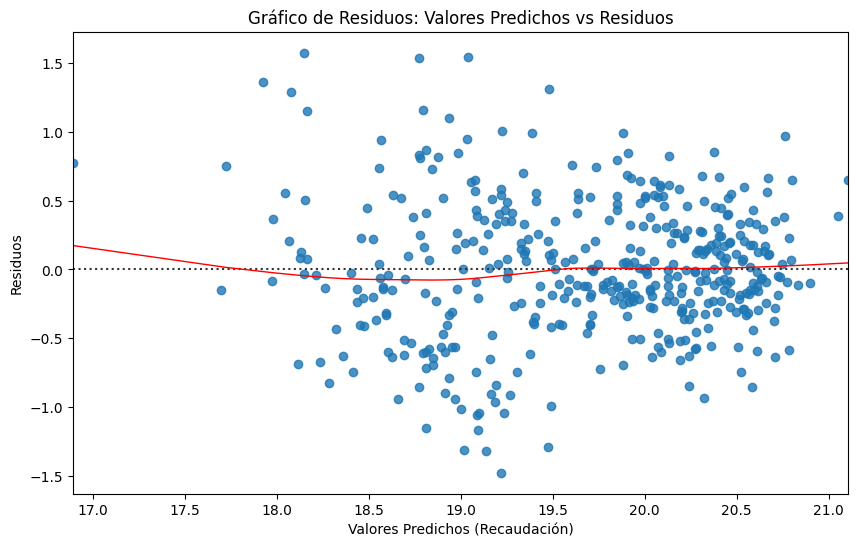

In [1117]:
# Gráfico de residuos
plt.figure(figsize=(10, 6))
sns.residplot(x=modelo_robusto.fittedvalues, y=modelo.resid, lowess=True, 
              line_kws={'color': 'red', 'lw': 1})
plt.title('Gráfico de Residuos: Valores Predichos vs Residuos')
plt.xlabel('Valores Predichos (Recaudación)')
plt.ylabel('Residuos')
plt.show()

La dispersión no es perfectamente uniforme. La línea roja se mantiene bastante cerca del cero, lo que es positivo, pero la amplitud de los puntos sugiere una heterocedasticidad moderada.

Para no depender solo de la vista, ejecutamos el test de hipótesis formal (Prueba de Breusch-Pagan)

H0​: Existe homocedasticidad (Varianza constante).

H1​: Existe heterocedasticidad (Varianza NO constante).

In [1118]:
# Realizamos el test de Breusch-Pagan
nombres = ['Estadístico Lagrange', 'p-valor BP', 'F-value', 'f p-value']
test_bp = sms.het_breuschpagan(modelo_robusto.resid, modelo_robusto.model.exog)

print("Resultados del Test de Breusch-Pagan:")
for nombre, valor in zip(nombres, test_bp):
    print(f"{nombre}: {valor:.4f}")

Resultados del Test de Breusch-Pagan:
Estadístico Lagrange: 42.0915
p-valor BP: 0.0000
F-value: 7.6499
f p-value: 0.0000


Dado que el p-valor es menor a 0.05 , rechazamos la hipótesis nula de homocedasticidad. Debido a este hallazgo, los resultados del modelo se reportaron utilizando Errores Estándar Robustos (HC3). Esto ajusta las desviaciones y asegura que nuestras pruebas de significancia (t y p-valores) sigan siendo válidas y confiables a pesar de la heterocedasticidad detectada

## Normalidad de los Residuos
Objetivo: Verificar que los errores del modelo sigan una distribución normal. Esto es esencial para garantizar que las pruebas de significancia y los intervalos de confianza calculados sean precisos.

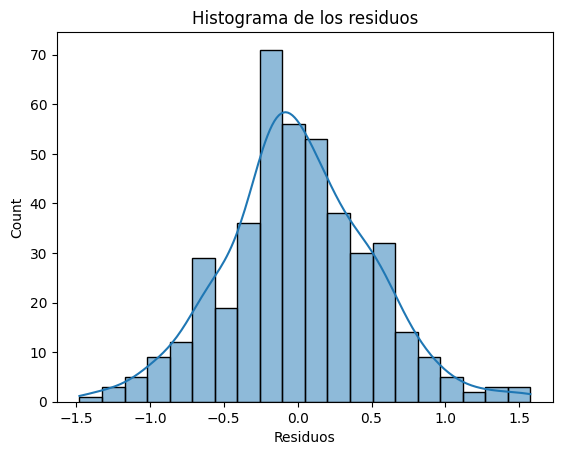

In [1119]:
# Histograma de los residuos
sns.histplot(modelo.resid, kde=True)
plt.xlabel('Residuos')
plt.title('Histograma de los residuos')
plt.show()

La distribución de los errores muestra una forma de campana muy clara y simétrica.La línea de densidad se superpone casi perfectamente con las barras del histograma, centrada en el valor cero. Visualmente, los residuos no presentan una asimetría marcada ni valores atípicos extremos que distorsionen la distribución, lo que sugiere que el supuesto se cumple.

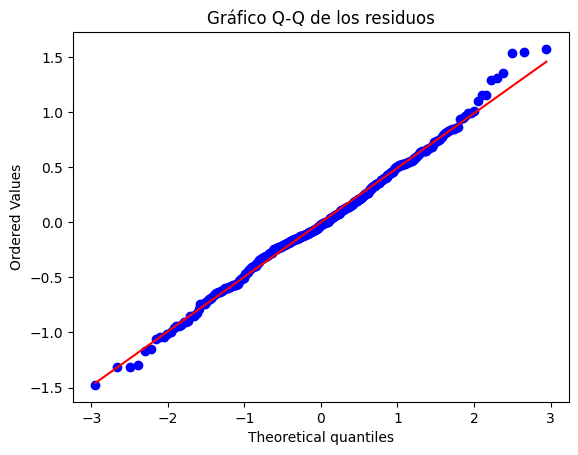

In [1120]:
# Gráfico Q-Q de los residuos
stats.probplot(modelo.resid, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los residuos')
plt.show()

Los puntos (residuos observados) siguen fielmente la línea diagonal roja (cuantiles teóricos de una normal). Solo se aprecian ligeras desviaciones en los extremos, lo cual es normal en datos reales y no compromete la validez del modelo.

Para complementar la evidencia visual realizamos la prueba de Shapiro-Wilk, la cual es considerada una de las más potentes para detectar desviaciones de la normalidad.

Se plantean las siguientes hipótesis:

    H0​ (Hipótesis Nula): Los residuos siguen una distribución normal.

    H1​ (Hipótesis Alternativa): Los residuos no siguen una distribución normal.

In [1121]:
from scipy.stats import shapiro

stat, p = shapiro(modelo_robusto.resid)

print(f'Estadístico de Shapiro-Wilk: {stat:.4f}')
print(f'P-valor: {p:.4f}')

if p > 0.05:
    print("No se rechaza la hipótesis nula (H0): Los residuos parecen seguir una distribución normal según Shapiro-Wilk.")
else:
    print("Se rechaza H0: Los residuos no siguen una distribución normal según Shapiro-Wilk.")

Estadístico de Shapiro-Wilk: 0.9942
P-valor: 0.1042
No se rechaza la hipótesis nula (H0): Los residuos parecen seguir una distribución normal según Shapiro-Wilk.


## No Multicolinealidad
Objetivo: Verificar que las variables independientes sean verdaderamente independientes entre sí. La presencia de multicolinealidad infla la varianza de los coeficientes, haciendo que los resultados sean inestables.


Para evaluar este supuesto, observamos el Cond. No. reportado en los resultados de la regresión. El resultado obtenido fue 23.8. El número de condición indica si hay problemas de multicolinealidad en el modelo. En la práctica estadística, un valor menor de 30 generalmente se considera aceptable y sugiere que no existe una redundancia severa entre las variables.

## Métricas principales

1. Calidad del Ajuste

R-cuadrado (R2): 0.704
Interpretación: El modelo explica el 70.4% de la variabilidad en la recaudación mundial. Es un valor muy alto para la industria del cine, lo que indica que las variables elegidas son predictores potentes.

El valor de Prob(F-statistic) es extredamente pequeño, lo cual nos da a entender que este modelo es estadísticamente significativo y confiable.

Todas las variables principales tienen un impacto positivo y estadísticamente significativo (P>∣t∣ de 0.000)

Presupuesto (log_film_budget): Tiene un coeficiente de 0.6419. Esto indica que por cada 1% que aumenta el presupuesto, se espera que la recaudación aumente aproximadamente un 0.64%. Es el motor principal del modelo.

Calificación IMDb (imdb_rating): Coeficiente de 0.1374. Por cada punto adicional en la calificación de IMDb, la recaudación tiende a subir de forma significativa.

Género Animación: Las películas de animación recaudan, en promedio, más que el género de referencia (presumiblemente Acción/Aventura si es el que quedó fuera).

MPAA PG-13: Tener una clasificación PG-13 aporta un "plus" positivo a la recaudación en comparación con otras clasificaciones.